<a href="https://colab.research.google.com/github/PatTheAtak/practical_dl/blob/main/basic_dense_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_circles

In [17]:
X, y = make_circles(n_samples=1000, 
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

print(X.shape)
print()
print(y.shape)

(1000, 2)

(1000,)


In [18]:
# Create an empty shell for our sequential model
model = Sequential() #planning to build my model sequentially

# Add the layers sequentially (one by one)
model.add(Dense(4, input_shape=(2, ), activation='tanh')) 
model.add(Dense(1, activation='sigmoid'))

# Compile the 
model.compile(optimizer=SGD(lr=0.5),
loss='binary_crossentropy',
metrics=['accuracy'])

In [19]:
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6861 - accuracy: 0.6262
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6735
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.8144
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.9268
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9980
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 1.0000
Epoch 11/20
32/32 [

In [20]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)

In [21]:
hticks[:10]

array([-1.5 , -1.47, -1.44, -1.41, -1.38, -1.35, -1.32, -1.29, -1.26,
       -1.23])

In [22]:
aa, bb = np.meshgrid(hticks, vticks)

In [23]:
aa.shape

(101, 101)

In [24]:
aa

array([[-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       ...,
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ]])

In [25]:
bb

array([[-1.5 , -1.5 , -1.5 , ..., -1.5 , -1.5 , -1.5 ],
       [-1.47, -1.47, -1.47, ..., -1.47, -1.47, -1.47],
       [-1.44, -1.44, -1.44, ..., -1.44, -1.44, -1.44],
       ...,
       [ 1.44,  1.44,  1.44, ...,  1.44,  1.44,  1.44],
       [ 1.47,  1.47,  1.47, ...,  1.47,  1.47,  1.47],
       [ 1.5 ,  1.5 ,  1.5 , ...,  1.5 ,  1.5 ,  1.5 ]])

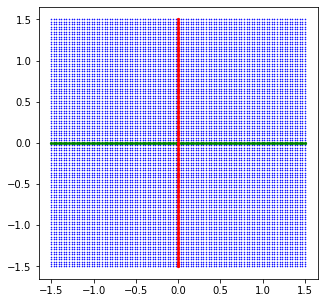

In [26]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=0.3, color='blue')
# highlight one horizontal series of grid points
plt.scatter(aa[50], bb[50], s=5, color='green')
# highlight one vertical series of grid points
plt.scatter(aa[:, 50], bb[:, 50], s=5, color='red');

In [27]:
ab = np.c_[aa.ravel(), bb.ravel()]

In [28]:
ab.shape

(10201, 2)

In [29]:
c = model.predict(ab)

In [30]:
c

array([[0.03447047],
       [0.03436089],
       [0.03423101],
       ...,
       [0.00539887],
       [0.00396189],
       [0.00281039]], dtype=float32)

In [31]:
print(c.shape)

(10201, 1)


In [32]:
cc = c.reshape(aa.shape)
cc.shape

(101, 101)

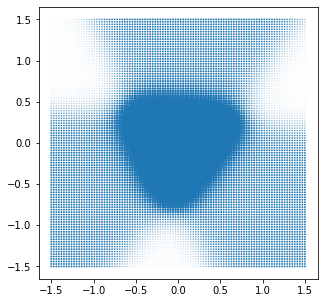

In [33]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=20*cc);

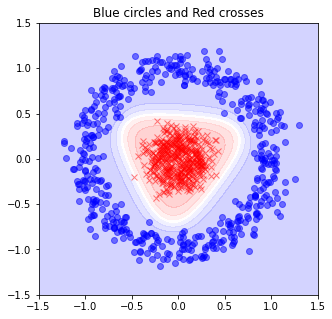

In [34]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.title("Blue circles and Red crosses");